# Példa 4.9-4.10

##### Megjegyzés:
Mivel a két példa nagyon hasonló, egy fileban oldjuk meg őket. A feladatokhoz tartozó mátrixokat $\boldsymbol{\sigma}_A$, illetve $\boldsymbol{\sigma}_B$ jelöli.

A feszültségi tenzor mátrixa egy anyagi pontban az $(x,y,z)$ koordinátarendszerben ismert. Határozzuk meg a főfeszültségeket és főirányokat sajátérték és sajátvektor számítással. Ábrázoljuk a feszültségi állapotot Mohr-körök segítségével!

$$\boldsymbol{\sigma}_A=\left[\begin{matrix} 90 & 40 & 0\\ 40 & 30 & 0\\ 0 & 0 & -50 \end{matrix}\right] \rm{MPa}$$

$$\boldsymbol{\sigma}_B=\left[\begin{matrix} -30 & 0 & 0\\ 0 & -20 & -40\\ 0 & -40 & -10 \end{matrix}\right] \rm{MPa}$$

# Megoldás

Szükségünk lesz a `sympy` modulra.

In [1]:
import sympy as sp
sp.init_printing()

A sajátértékszámítás eredményeinek olvashatóbb kiíratásához a *4.3-4.5.ipynb*-ben definiált függvényt egy *sajat_fuggvenyeket_tartalmazo_fajl.py* külső fájlban tároljuk a *notebook*-unk mellett. Ahhoz, hogy ebben a notebook-ban tudjuk használni, ebből a fájlból importálnunk kell. Ezzel elkerülhető, hogy minden egyes notebook-ban ezt a függvényt külön nekünk definiálni kellene (a rendes Python könyvtárak is hasonlóan működnek).

In [2]:
from sajat_fuggvenyeket_tartalmazo_fajl import print_eigensystem

Saját függvények definiálása során nagyon figyeljünk arra, hogy az milyen bemeneteket fogad, ez a `print_eigensystem` esetében csak `sympy` mátrix.

## $\boldsymbol{\sigma}_A$ mátrix

In [3]:
σAx = 90
σAy = 30
σAz = -50
τAxy = 40
σA = sp.Matrix([[σAx,τAxy,0],[τAxy,σAy,0],[0,0,σAz]])

### Sajátérték - sajátvektor számítás


1. Főfeszültség: 110.00 MPa
1. Főirány: 


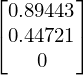

2. Főfeszültség: 10.000 MPa
2. Főirány: 


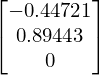

3. Főfeszültség: -50.000 MPa
3. Főirány: 


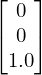

In [4]:
print_eigensystem(σA)

Ez a függvény akkor is jól működik, ha többszörös sajátértékeink vannak. Vegyük szélsőséges példának az egységmátrixot! Tudjuk, hogy ennek az egyetlen sajátértéke az 1, melynek multiplicitása 3-szoros. Az ehhez tartozó sajátvektorok pedig az $\mathbf{i}, \mathbf{j}$ és $\mathbf{k}$.

A `sympy` modulban $N\times N$-es egységmátrixot az `sp.eye(N)` paranccsal hozhatunk létre.

1. Főfeszültség: 1.0000 MPa
1. Főirány: 


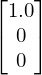

2. Főfeszültség: 1.0000 MPa
2. Főirány: 


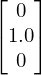

3. Főfeszültség: 1.0000 MPa
3. Főirány: 


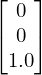

In [5]:
print_eigensystem(sp.eye(3))

### Mohr körös ellenőrzés

#### Megjegyzés:
A Mohr körök módszere eredetileg a sajátérték, sajátvektor számítás megkerülésére/felgyorsítására szolgált. A bemutatott "szerkesztéshez" szükséges, hogy az egyik feszültségi irány főfeszültségi irány legyen. Az előbb láthattuk, hogy a sajátérték, sajátvektor számítás számítógéppel nem okoz problémát, és nincsenek megkötéseink a feszültségek irányára. (Csak győzzük a számítógép által számolt dolgokat értelmezni és a nekünk kellő formára hozni...) Ezen felül "szerkeszteni" a számítógépen nehézkes (ha nem célszoftvert használunk - a Python nem az), ezért a Mohr körös megoldás itt csak ellenőrzésre szolgál.

Szükségünk lesz a `matplotlib.pyplot` modulra, valamint a `numpy` modulból több függvényre is - ezért most a teljes modult importáljuk. A `numpy` neve a "Numercial Python"-ból ered, több olyan függvénye van, ami hasznos lesz számunkra.

A `matplotlib` az általunk használt szintaktikával (`plt.utasitas`-ok után `plt.show()`) minden egyes ábrázoláskor törli a megjegyzett dolgokat, ezért ebben a példában az érthetőség kedvéért az egyes részeket külön-külön kirajzoljuk, majd az összes rész kódját összekombinálva rajzoljuk ki a végleges ábrát.

1. lépés: A $\boldsymbol{\sigma}_A$ mátrix által megadott feszültségállapotot felrajzoljuk a $\sigma-|\tau|$ síkra.

In [6]:
import matplotlib.pyplot as plt #betöltjük a plotoló modult
import numpy as np #betöltjük a numpy modult

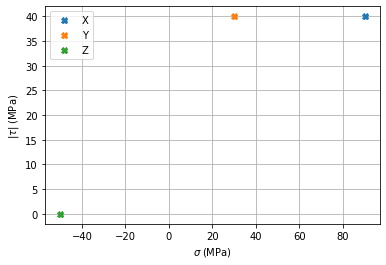

In [7]:
#az X pont, a σx-τxy értékpárból:
plt.plot(σAx,τAxy,'X',label="X") #'X': a kirajzolt marker formája, 'label="X"': a jelmagyarázatban kiírt név
#az Y pont, a σy-τxy értékpárból:
plt.plot(σAy,τAxy,'X',label="Y")
#a Z pont, a σz-0 értékpárból:
plt.plot(σAz,0,'X',label="Z")
plt.xlabel(r"$\sigma \; \rm{(MPa)}$")
plt.ylabel(r"$|\tau| \; \rm{(MPa)}$")
plt.legend()
plt.grid()
plt.show()

2. lépés: $\sigma_x$, $\sigma_y$ és $\tau_{xy}$ alapján:
$$\sigma_{AK}=\frac{\sigma_x+\sigma_y}{2},$$  
$$R_{A}=\sqrt{\left(\frac{\sigma_x-\sigma_y}{2}\right)^2+\tau_{xy}^2}.$$

$\sigma_K$ középponttal és $R$ sugárral rajzolunk egy félkört. Ennek egyik módja, hogy a félkör pontjainak $x$ (avagy $\sigma$) koordinátáit $\sigma_K+R\cos \varphi$-ként, $y$ (avagy $|\tau|$) koordinátáit $R\sin \varphi$-ként kapjuk, ahol $\varphi=0\ldots \pi$.

Hasonló módon rajzolhatjuk ki a másik két félkört, melyeknek középpontja: $$\sigma_{AK2}=\frac{\sigma_z+\sigma_{AK}+R_A}{2},$$  
$$\sigma_{AK3}=\frac{\sigma_z+\sigma_{AK}-R_A}{2}.$$

A félkörök sugarai: $$R_{A2}=\frac{\sigma_z+\sigma_{AK}+R_A}{2}-\sigma_z,$$  
$$R_{A3}=\frac{\sigma_z+\sigma_{AK}-R_A}{2}-\sigma_z.$$

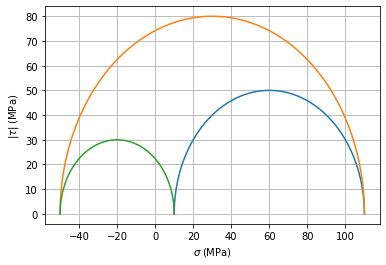

In [8]:
fi=np.linspace(0,np.pi,201) #mivel most az egész 'numpy'-t importáltuk, kell az 'np' előtag

#az első félkör számolása:
σAK=(σAx+σAy)/2
RA=sp.sqrt(((σAx-σAy)/2)**2+τAxy**2)
felkor1x=σAK+RA*np.cos(fi) #az első félkör x koordinátái
felkor1y=RA*np.sin(fi) #az első félkör y koordinátái

#a második félkör számolása:
σAK2=(σAz+σAK+RA)/2
RA2=(σAz+σAK+RA)/2-σAz
felkor2x=σAK2+RA2*np.cos(fi)
felkor2y=RA2*np.sin(fi)

#a 3. félkör számolása:
σAK3=(σAz+σAK-RA)/2
RA3=(σAz+σAK-RA)/2-σAz
felkor3x=σAK3+RA3*np.cos(fi)
felkor3y=RA3*np.sin(fi)

plt.plot(felkor1x,felkor1y)
plt.plot(felkor2x,felkor2y)
plt.plot(felkor3x,felkor3y)
plt.xlabel(r"$\sigma \; \rm{(MPa)}$")
plt.ylabel(r"$|\tau| \; \rm{(MPa)}$")
plt.grid()
plt.show()

Ezek alapján a főfeszültségek:
$$\sigma_{A1}=\sigma_{AK}+R=110 \; \rm{MPa}$$
$$\sigma_{A2}=\sigma_{AK}-R=10 \; \rm{MPa}$$
$$\sigma_{A3}=\sigma_z=-50 \; \rm{MPa}$$
Ezek megegyeznek a korábbi eredményekkel.

3. lépés: A $\sigma_{AK}-X$ szakasz vízszintes tengellyel bezárt szögének ($2\alpha$) a fele adja meg, hogy hány fokkal kell elforgatnunk a koordináta rendszert a főirányok megkapásához. Geometriai megfontolásból:
$$\tan{2\alpha}=\frac{|\tau_{xy}|}{\sigma_x-\sigma_K}=\frac{2|\tau_{xy}|}{\sigma_x-\sigma_y} \Rightarrow \alpha=\frac 12 \arctan \frac{2|\tau_{xy}|}{\sigma_x-\sigma_y}.$$

In [9]:
αA=sp.atan(2*sp.Abs(τAxy)/(σAx-σAy))/2
αA.evalf(5) #α értéke radiánban

In [10]:
def rad2deg(rad):           # Saját függvény a radián-fok átváltáshoz.
    return rad*180/sp.pi

αAn=rad2deg(αA).evalf(5) 
αAn

Most ábrázolhatjuk a félköröket és pontokat egy ábrán, valamint bejelölhetjük a $\sigma_K-X$ szakaszt is.

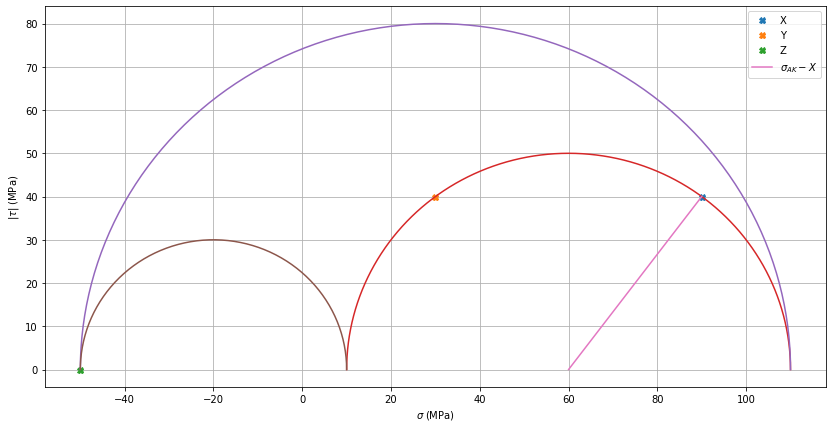

In [11]:
plt.figure(figsize=(14,7)) #ábra mérete

#X, Y, Z pontok
plt.plot(σAx,τAxy,'X',label="X")
plt.plot(σAy,τAxy,'X',label="Y")
plt.plot(σAz,0,'X',label="Z")

#félkörök
plt.plot(felkor1x,felkor1y)
plt.plot(felkor2x,felkor2y)
plt.plot(felkor3x,felkor3y)

#σAK-X szakasz
plt.plot([σAK,σAx],[0,τAxy],label=r"$\sigma_{AK}-X}$")

plt.xlabel(r"$\sigma \; \rm{(MPa)}$")
plt.ylabel(r"$|\tau| \; \rm{(MPa)}$")
plt.legend()
plt.grid()
plt.show()

Az $\alpha$ szöggel kell elforgatni az $x$ tengelyt a $z$ körül a $\tau_{xy}$ irányába, hogy megkapjuk az 1-es főirányt.
<img src="Fig_4.9a.png" style="width: 400px;">

Ez alapján az 1-es főirányt kijelölő egységvektor:
$$\mathbf{e}_1=\left[\begin{matrix}\cos \alpha \\ \sin \alpha \\0\end{matrix}\right].$$

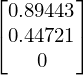

In [12]:
e1A=sp.Matrix([sp.cos(αA),sp.sin(αA),0])
e1A.evalf(5)

Mivel $\sigma_z$ főfeszültség, ezért:
$$\mathbf{e}_3=\mathbf{k}=\left[\begin{matrix}0 \\ 0 \\1\end{matrix}\right].$$

Így $\mathbf{e}_2$ a következő módon számolható:
$$\mathbf{e}_2=\mathbf{e}_3 \times \mathbf{e}_1.$$

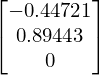

In [13]:
e3A=sp.Matrix([0,0,1])
e2A=e3A.cross(e1A)
e2A.evalf(5)

Láthatjuk, hogy az eredmények megegyeznek a sajátérték és sajátvektor számítással kapottakkal.

## $\boldsymbol{\sigma}_B$ mátrix

$$\boldsymbol{\sigma}_B=\left[\begin{matrix} -30 & 0 & 0\\ 0 & -20 & -40\\ 0 & -40 & -10 \end{matrix}\right] \rm{MPa}$$


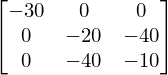

In [14]:
σBx = -30
σBy = -20
σBz = -10
τByz = -40
σB = sp.Matrix([[σBx,0,0],[0,σBy,τByz],[0,τByz,σBz]])
σB

Ezen a mátrixon is elvégezhetnénk az előbbihez hasonló módon a sajátérték és sajátvektor számítást, illetve a Mohr körös ábrázolást.

Ehelyett írjunk függvényt a Mohr körökhöz, amellyel tetszőleges $\boldsymbol{\sigma}$-ra könnyen ki tudjuk rajzolni őket! Ennek során felhasználjuk a $\boldsymbol{\sigma}_A$-ra használt kódot is (ezeket a részeket nem magyarázzuk újra részletesen).

1. Főfeszültség: 25.311 MPa
1. Főirány: 


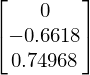

2. Főfeszültség: -30.000 MPa
2. Főirány: 


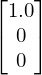

3. Főfeszültség: -55.311 MPa
3. Főirány: 


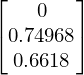

In [15]:
print_eigensystem(σB)

Láthatjuk, hogy az első és utolsó egységvektorok nem egyeznek meg a PDF-es kidolgozásban lévőkkel, hanem azokkal pont ellentétesek. Ez nem probléma, az itt kapott vektorok ugyanúgy jobbsodrású rendszert alkotnak.

### Mohr körös ábrázoló

A Mohr körök csak fizikailag helyes feszültségállapot esetén adnak jó eredményt, ezért ha itt nem szimmetrikus mátrixot kapnánk bemenetnek, a számolást nem folytatjuk. A `return` utasítással léphetünk ki a függvényből. Hogy a beadott mátrix szimmetrikus-e, azt a `matrix.is_symmetric()` utasítással ellenőrizzük.

A Mohr körök módszere csak akkor használható, ha $\sigma_x, \sigma_y$ és $\sigma_z$ közül az egyik főfeszültség. Ha általános függvényt akarunk írni, akkor ezt ellenőriznünk kell a programban. Ezt több elven meg lehet valósítani.

Mi azt fogjuk vizsgálni, hogy a $\tau$ feszültségek közül legalább kettőnek 0-nak kell lennie. A `bool()` függvény számokra `True` értéket ad, kivéve, ha a szám 0 - ekkor `False`-t ad. A `True` és `False` értékek kezelhetők számként (összeadhatók, kivonhatók, szorozhatók, stb.) olyan módon, hogy a `True` 1-nek, a `False` 0-nak felel meg. Azaz ha a $\tau$ feszültségekre egyesével meghívjuk a `bool()`-t és az eredményeket összeadjuk, akkor megkapjuk a nemnulla $\tau$ feszültségek darabszámát. Ha ez 2-nél kisebb, akkor van olyan mátrixunk, ami a Mohr körök módszerével kezelhető. Ha 2 vagy 3, akkor kilépünk a függvényből.

A függvényen belül is definiálhatunk alfüggvényeket. Az alfüggvényeket csak a függvényből érjük el, és ugyan azzal a szintaktikával definiáljuk őket, mint a "sima" függvényeket (csak indentáljuk őket a fő-függvénynek megfelelően). A `mohr()` függvényen belül definiálunk egy `felkorok()` alfüggvényt, ami kirajzolja a főfeszültség, a két további húzófeszültség és a csúsztatófeszültség alapján a félköröket. A `felkor()` alfüggvény ehhez ad segítséget, kiszámolja a középpont és sugár alapján az $x$ és $y$ koordinátákat, melyek alapján majd ábrázolunk.

A `return valami,valami2,valami3...` szintaktikát haszálva a függvény által adott eredményeket külön változóba tárolhatjuk el.

Az $\alpha$ szög meghatározásához ki kell választanunk a nem főfeszültséghez tartozó pontok közül azt, ahol $\sigma$ nagyobb. Ezt összekötve $\sigma_K$-val adódik a $2\alpha$ szög.

In [16]:
def mohr(matrix):
    def felkor(Kp,Rf):
        Rf=sp.Abs(Rf)
        x=Kp+Rf*np.cos(fi)
        y=Rf*np.sin(fi)
        return x,y

    def felkorok(σfo,σnemfo,σnemfo2,τ):
        #félkörök középpontja és sugara:
        σK1=(σnemfo+σnemfo2)/2
        R1=sp.sqrt(((σnemfo-σnemfo2)/2)**2+τ**2)        
        σK2=(σfo+σK1+R1)/2
        R2=(σfo+σK1+R1)/2-σfo        
        σK3=(σfo+σK1-R1)/2
        R3=(σfo+σK1-R1)/2-σfo        
        felkor1x,felkor1y=felkor(σK1,R1)
        felkor2x,felkor2y=felkor(σK2,R2)
        felkor3x,felkor3y=felkor(σK3,R3)

        plt.plot(felkor1x,felkor1y)
        plt.plot(felkor2x,felkor2y)
        plt.plot(felkor3x,felkor3y)
    
    if not matrix.is_symmetric():
        print("Ez a mátrix nem szimmetrikus, így a beadott feszültségállapotnak fizikailag nincs értelme!")
        print("A Mohr körök ilyenkor nem adnak jó eredményt!")
        return
    
    σx=matrix[0,0]
    σy=matrix[1,1]
    σz=matrix[2,2]
    #a Mohr körök módszerével a τ feszültségeknek az abszolút értékét vizsgáljuk
    τxy=sp.Abs(matrix[0,1])
    τxz=sp.Abs(matrix[0,2])
    τyz=sp.Abs(matrix[1,2])
    
    τxy_nemnulla=bool(τxy) # => A 'z' irány feszültségi főirány
    τxz_nemnulla=bool(τxz) # => Az 'y' irány feszültségi főirány
    τyz_nemnulla=bool(τyz) # => Az 'x' irány feszültségi főirány
    
    nemnulla_darab=τxy_nemnulla+τxz_nemnulla+τyz_nemnulla
    if nemnulla_darab>1:
        print("Ez a mátrix Mohr körökkel nem kezelhető!")
        return
    
    fi=np.linspace(0,np.pi,201)    
    plt.figure(figsize=(14,7)) #ábra mérete   
        
    if τxy_nemnulla:
        print("A 'z' irány feszültségi főirány.")
        plt.plot(σx,τxy,'X',label="X")
        plt.plot(σy,τxy,'X',label="Y")
        plt.plot(σz,0,'X',label="Z")        
        felkorok(σz,σx,σy,τxy)
        σK=(σx+σy)/2        
        plt.plot([σK,max(σx,σy)],[0,τxy])
        α=sp.atan(2*sp.Abs(τxy/(σx-σy)))/2
        
                  
    elif τxz_nemnulla:
        print("Az 'y' irány feszültségi főirány.")
        plt.plot(σx,τxz,'X',label="X")
        plt.plot(σy,0,'X',label="Y")
        plt.plot(σz,τxz,'X',label="Z")        
        felkorok(σy,σz,σx,τxz)
        σK=(σx+σz)/2        
        plt.plot([σK,max(σx,σz)],[0,τxz])
        α=sp.atan(2*sp.Abs(τxz/(σz-σx)))/2
        
    elif τyz_nemnulla:
        print("Az 'x' irány feszültségi főirány.")
        plt.plot(σx,0,'X',label="X")
        plt.plot(σy,τyz,'X',label="Y")
        plt.plot(σz,τyz,'X',label="Z")        
        felkorok(σx,σz,σy,τyz)
        σK=(σz+σy)/2        
        plt.plot([σK,max(σz,σy)],[0,τyz])
        α=sp.atan(2*sp.Abs(τyz/(σz-σy)))/2
        
    else: #mindegyik τ feszültség 0!
        print("Mindegyik irány feszültségi főirány.")
        plt.plot(σx,0,'X',label="X")
        plt.plot(σy,0,'X',label="Y")
        plt.plot(σz,0,'X',label="Z")        
        felkorok(σx,σz,σy,0)
        α=0
   
    plt.xlabel(r"$\sigma \; \rm{(MPa)}$")
    plt.ylabel(r"$|\tau| \; \rm{(MPa)}$")
    plt.legend()
    plt.grid()
    plt.show()
    
    print("α értéke:")
    display(rad2deg(α).evalf(5))


Most már elvégezhetjük a Mohr körök ábrázolását a $\boldsymbol{\sigma}_B$ mátrixon is. Ha jól írtuk meg a kódot, akkor tetszőleges mátrixra elvégezhető az ábrázolás a `mohr()` függvénnyel.

Az 'x' irány feszültségi főirány.


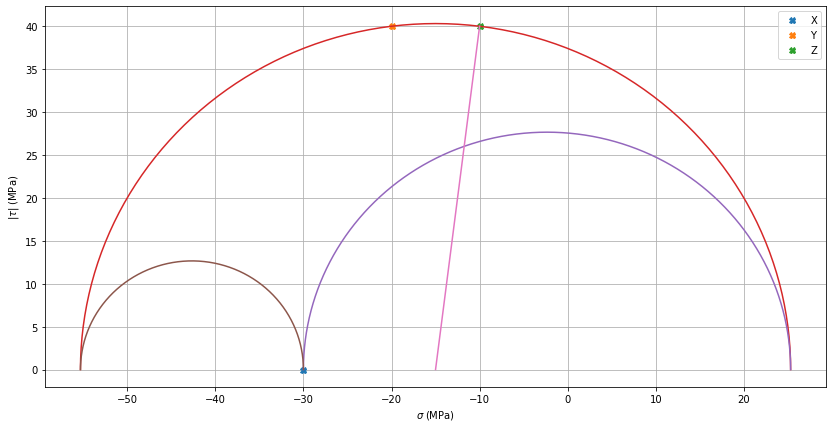

α értéke:


In [17]:
mohr(σB)